In [1]:
import os
import imgaug as ia
import numpy as np
import imgaug.augmenters as iaa
import cv2
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage


In [2]:
ia.seed(100)

In [3]:
# image_folder_path = r"F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\images"
# labels_folder_path = r"F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels"
# output_folder_path = r"F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\aug_images"
# output_folder_label_path = r"F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\aug_labels"
image_folder_path = r"F:\Harshit\Harshit_Testing\aug_test\images"
labels_folder_path = r"F:\Harshit\Harshit_Testing\aug_test\labels"
output_folder_path = r"F:\Harshit\Harshit_Testing\aug_test\aug_images"
output_folder_label_path = r"F:\Harshit\Harshit_Testing\aug_test\aug_labels"

In [4]:
os.makedirs(output_folder_label_path, exist_ok=True)
os.makedirs(output_folder_path, exist_ok=True)

4
4
4
4


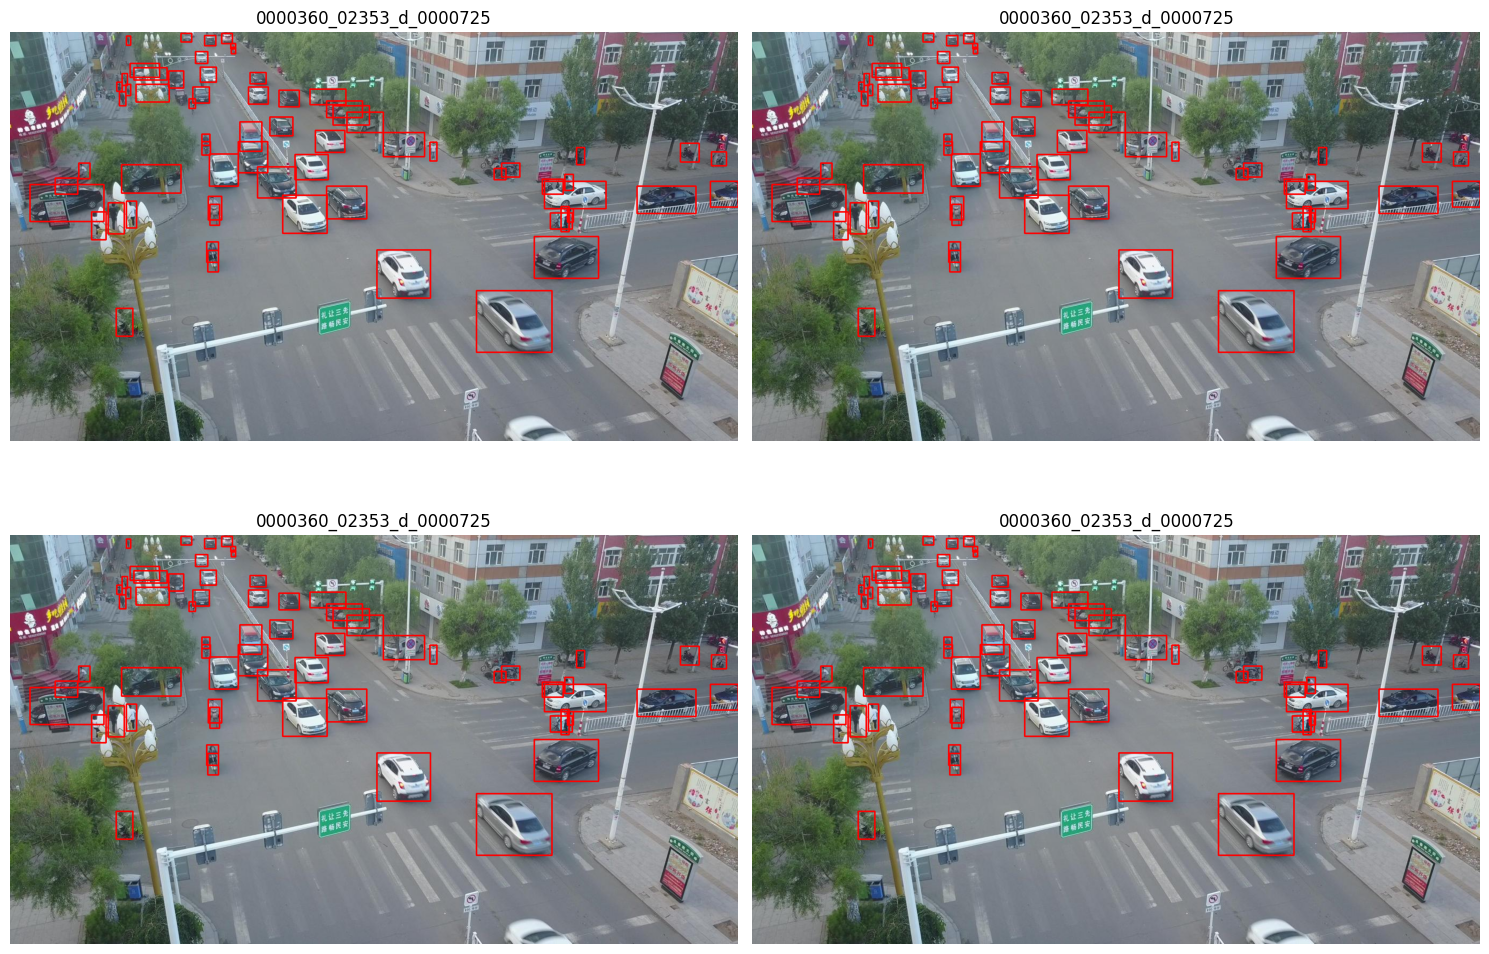

In [5]:
# plotting after yolo conversion
import matplotlib.pyplot as plt
import random
import cv2
import glob

from PIL import Image, ImageDraw

# function to plot the bounding boxes to their respective images
def plot_box(image, bboxes, labels):
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
    
        x1, y1, x2, y2 = yolo2bbox(box, w, h)
        thickness = 2
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        cv2.rectangle(
            image,
            (x1, y1), (x2, y2),
            (0, 0, 255),
            thickness
        )
    return image


def yolo2bbox(bboxes, w, h):
    half_width = (bboxes[2] * w) / 2
    half_height = (bboxes[3] * h) / 2
    x_min = int((bboxes[0] * w) - half_width)
    y_min = int((bboxes[1] * h) - half_height)
    x_max = int((bboxes[0] * w) + half_width)
    y_max = int((bboxes[1] * h) + half_height)
    return [x_min, y_min, x_max, y_max]



def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    # print(all_images)
    
    # all_images.sort()data = line.strip().split(' ')

    num_images = len(all_images)
    # print(num_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        print(num_samples)
        # j = random.randint(0,num_samples-1)
        j = 0
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        bboxes = []
        labels = []
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            label_lines = f.readlines()
            for label_line in label_lines:
                data = label_line.strip().split(' ')
                image_class = data[0]
                bounding_box = [float(val) for val in data[1:]]
                # img = Image.open("datasets/VisDrone/VisDrone2019-DET-train/images/"+image_name + ".jpg")
                bboxes.append(bounding_box)
                labels.append(image_class)
                # x_c, y_c, w, h = image_size
                # x_c = float(x_c)
                # y_c = float(y_c)
                # w = float(w)
                # h = float(h)
                # bboxes.append([x_c, y_c, w, h])
                # labels.append(label)
        result_image = plot_box(image, bboxes , labels)
        
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.title(image_name)
        plt.axis('off')

    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()
    


plot(
    image_paths=image_folder_path, 
    label_paths=labels_folder_path,
    num_samples=4,
)



In [6]:
# conversion of x_center, y_center, width, height
def conversion(line, img_shape_w, img_shape_h):
    class_label, x_center, y_center, width, height = line;
    x_left_top = (x_center - width/2) * img_shape_w
    y_left_top = (y_center - height/2) * img_shape_h
    x_right_bottom = (x_center + width/2) * img_shape_w
    y_right_bottom = (y_center + height/2) * img_shape_h
    
    return [class_label, x_left_top, y_left_top, x_right_bottom, y_right_bottom]
    

In [7]:
a = conversion([0, 0.5536458333333333, 0.9458333333333333, 0.07916666666666655, 0.10833333333333334], 1920, 1080)
a

[0, 987.0, 962.9999999999999, 1138.9999999999998, 1080.0]

In [8]:
def reconversion(line, image_shape_w, image_shape_h):
    class_label, x1, y1, x2, y2 = line
    x_center = ((x2 + x1)/2) / image_shape_w
    y_center =  ((y2 + y1)/2)/ image_shape_h
    width = abs(x2 - x1)  / image_shape_w
    height = abs(y2 - y1)/ image_shape_h
    return [class_label, x_center, y_center, width, height]

In [9]:
b = reconversion([0, 448.0, 216.0, 832.0, 360.0], 1280.0, 720.0)
b

[0, 0.5, 0.4, 0.3, 0.2]

In [14]:
# lets augment it and save it to my folder

image_files = [f for f in os.listdir(image_folder_path)]
for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(labels_folder_path, label_file)
    
    
    with open(label_path, 'r') as file:
        lines = file.readlines()
    bounding_boxes = []
    for line in lines:
        values = line.split()
        values = [float(value) for value in values]
        image = cv2.imread(image_path)
        img_shape_w = image.shape[1] #width_scale
        img_shape_h = image.shape[0] # height_scale
        class_label, x1, y1, x2, y2 = conversion(values, img_shape_w, img_shape_h)
        # we need to calculate our box values to feed next functions
        bounding_box = BoundingBox(x1, y1, x2, y2, label=class_label)
        bounding_boxes.append(bounding_box)
    bbs = BoundingBoxesOnImage(bounding_boxes, shape=image.shape)
    # print(label_path)
    seq = iaa.Sequential([
        iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        # rotate=(-25, 25),
        shear=(-8, 8)
        ),
        iaa.Crop(percent=(0, 0.1)),
        
        # iaa.Fliplr(0.5),
        iaa.Sometimes(
            0.5,
            iaa.GaussianBlur(sigma=(0, 0.5))
        ),
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
        iaa.LinearContrast((0.75, 1.5)),
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
    ], random_order=True)
    aug_image = seq(images = [image])[0]
    bbs_aug = seq(bounding_boxes = bbs)
    
    # output image path 
    output_image_path = os.path.join(output_folder_path, f"Aug_sher_{image_file}")
    cv2.imwrite(output_image_path, aug_image)
    
    output_label_path = os.path.join(output_folder_label_path, f"Aug_sher_{label_file}")
    with open(output_label_path, 'w') as op_file:
        for i in range(len(bbs.bounding_boxes)):
            coordinates = [bbs_aug.bounding_boxes[i].label, bbs_aug.bounding_boxes[i].x1, bbs_aug.bounding_boxes[i].y1, bbs_aug.bounding_boxes[i].x2, bbs_aug.bounding_boxes[i].y2]
            updated_coordinates = reconversion(coordinates, image.shape[1], image.shape[0])
          
            op_file.write(f"{int(updated_coordinates[0])} {updated_coordinates[1]} {updated_coordinates[2]} {updated_coordinates[3]} {updated_coordinates[4]}\n")        
    # print(bbs.bounding_boxes)
    # for before, after in zip(bbs.bounding_boxes, bbs_aug.bounding_boxes):
    #     cv2.rectangle(image, (int(before.x1), int(before.y1)), (int(before.x2), int(before.y2)), (0, 255, 0), 2)
    #     cv2.rectangle(aug_image, (int(after.x1), int(after.y1)), (int(after.x2), int(after.y2)), (0, 255, 0), 2)
    # cv2.imshow('Original image_before', image)
    # cv2.imshow('Augmented image_after', aug_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


4
4
4
4


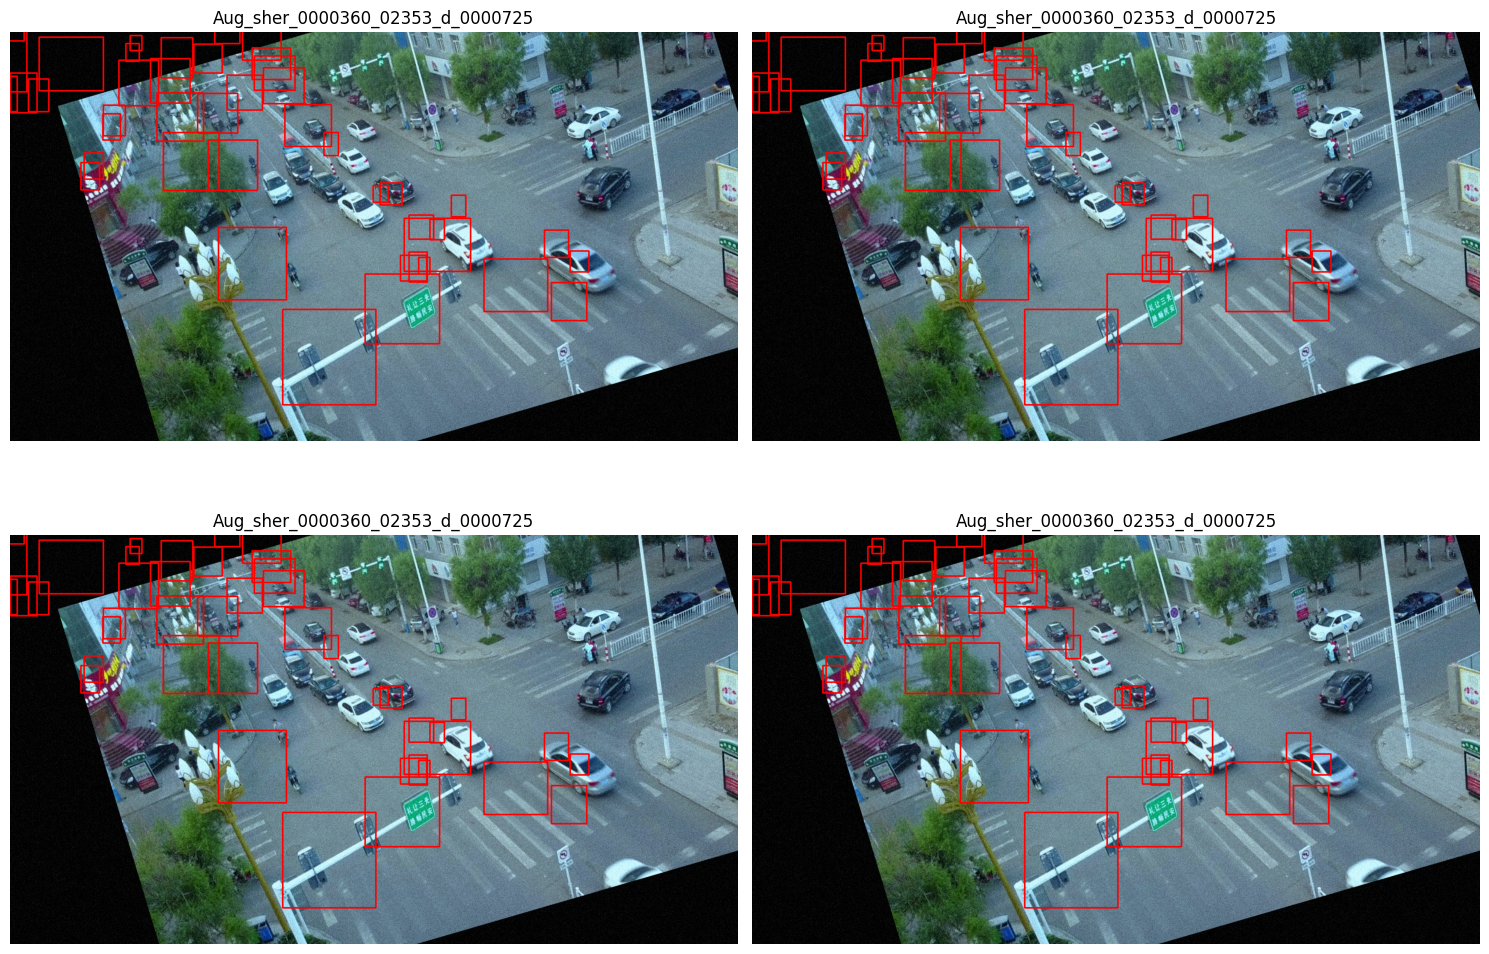

In [15]:
plot(
    image_paths=output_folder_path, 
    label_paths=output_folder_label_path,
    num_samples=4,
)

